In [1]:
import torch.nn as nn
from pytorch_wavelets import DWTForward
import torch
import numpy as np

In [11]:
class Down_wt(nn.Module):
    def __init__(self):
        super(Down_wt, self).__init__()
        self.wt = DWTForward(J=1, mode='zero', wave='haar')
        # self.conv_bn_relu = nn.Sequential(
        #     nn.Conv2d(in_ch * 2, out_ch, kernel_size=1, stride=1),
        #     nn.BatchNorm2d(out_ch),  
        #     nn.ReLU(inplace=True), 
        # )
    def forward(self, x):
        yL, [yH, *_]  = self.wt(x)
        # y_HL = yH[:, :, 0, :]  # 水平高频
        # y_LH = yH[:, :, 1, :]  # 垂直高频
        # y_HH = yH[:, :, 2, :]  # 对角高频
        yH = yH.sum(dim=2, keepdim=False)  # 水平高频
        # x = torch.cat([yL, yL+yH], dim=1)
        # x = self.conv_bn_relu(x)
        return yL, yH+yL

In [3]:
feat = np.load('feat.npy')

In [4]:
feat.shape

(7, 24, 128, 128)

In [5]:
feat = torch.from_numpy(feat)

In [12]:
model = Down_wt()

In [13]:
result = model(feat)

In [14]:
result[0].size()

torch.Size([7, 24, 64, 64])

In [10]:
r2 = torch.max_pool2d(feat, kernel_size=2, stride=2)

In [11]:
r2.size()

torch.Size([7, 24, 64, 64])

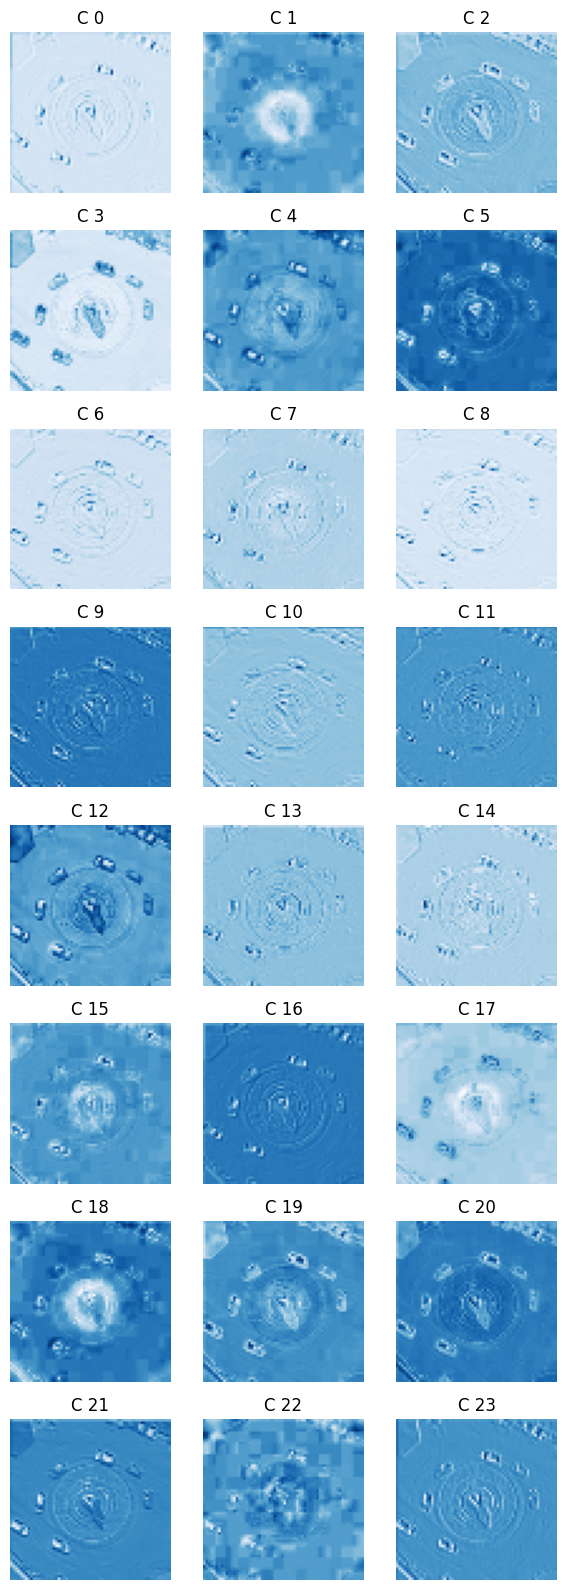

In [16]:
from matplotlib import pyplot as plt
feat = result[1][0]  # 取第一个批次，形状变为 (C, H, W)
C = feat.shape[0]  # 获取通道数

# 设置固定的行数
n_rows = 8  # 固定为8行

# 计算需要的列数（向上取整以确保能显示所有通道）
n_cols = int(np.ceil(C / n_rows))

# 创建一个更美观的图表布局
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))  # 每个子图 2x2 英寸

# 将axes展平为一维数组以便于索引
axes = axes.flatten() if n_rows * n_cols > 1 else [axes]

# 遍历所有通道并绘制
for i in range(n_rows * n_cols):
    if i < C:  # 确保索引有效（不超出通道数）
        # 显示该通道的特征图
        im = axes[i].imshow(feat[i], cmap='Blues')
        axes[i].set_title(f'C {i}')
    else:
        # 隐藏多余的子图
        axes[i].axis('off')
        axes[i].set_visible(False)
    
    # 对所有有效的子图，隐藏坐标轴
    if i < C:
        axes[i].axis('off')

# 调整布局，添加总标题
plt.tight_layout()

# plt.savefig('./figs/swin_4x.png', dpi=600, format='png', bbox_inches='tight')

# 显示图像
plt.show()


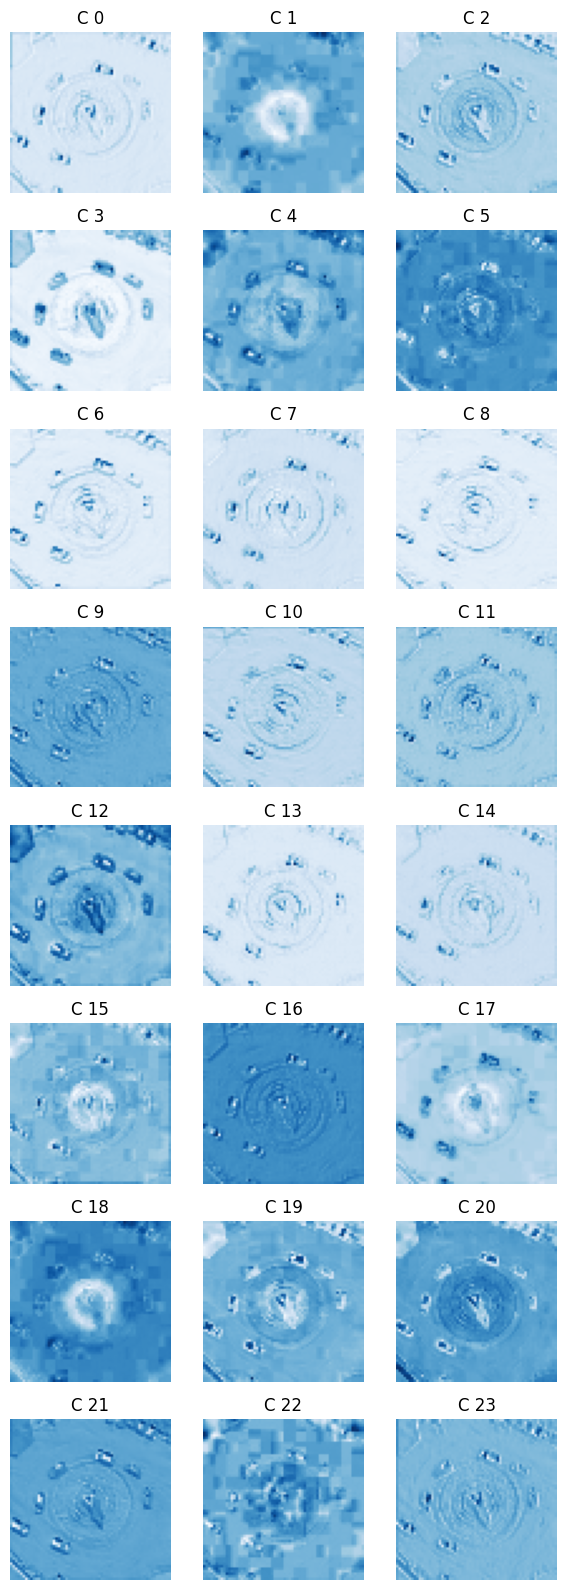

In [13]:
from matplotlib import pyplot as plt
feat = r2[0]  # 取第一个批次，形状变为 (C, H, W)
C = feat.shape[0]  # 获取通道数

# 设置固定的行数
n_rows = 8  # 固定为8行

# 计算需要的列数（向上取整以确保能显示所有通道）
n_cols = int(np.ceil(C / n_rows))

# 创建一个更美观的图表布局
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))  # 每个子图 2x2 英寸

# 将axes展平为一维数组以便于索引
axes = axes.flatten() if n_rows * n_cols > 1 else [axes]

# 遍历所有通道并绘制
for i in range(n_rows * n_cols):
    if i < C:  # 确保索引有效（不超出通道数）
        # 显示该通道的特征图
        im = axes[i].imshow(feat[i], cmap='Blues')
        axes[i].set_title(f'C {i}')
    else:
        # 隐藏多余的子图
        axes[i].axis('off')
        axes[i].set_visible(False)
    
    # 对所有有效的子图，隐藏坐标轴
    if i < C:
        axes[i].axis('off')

# 调整布局，添加总标题
plt.tight_layout()

# plt.savefig('./figs/swin_4x.png', dpi=600, format='png', bbox_inches='tight')

# 显示图像
plt.show()


In [20]:
t1 = result[1] + result[2] + result[0] + result[3]

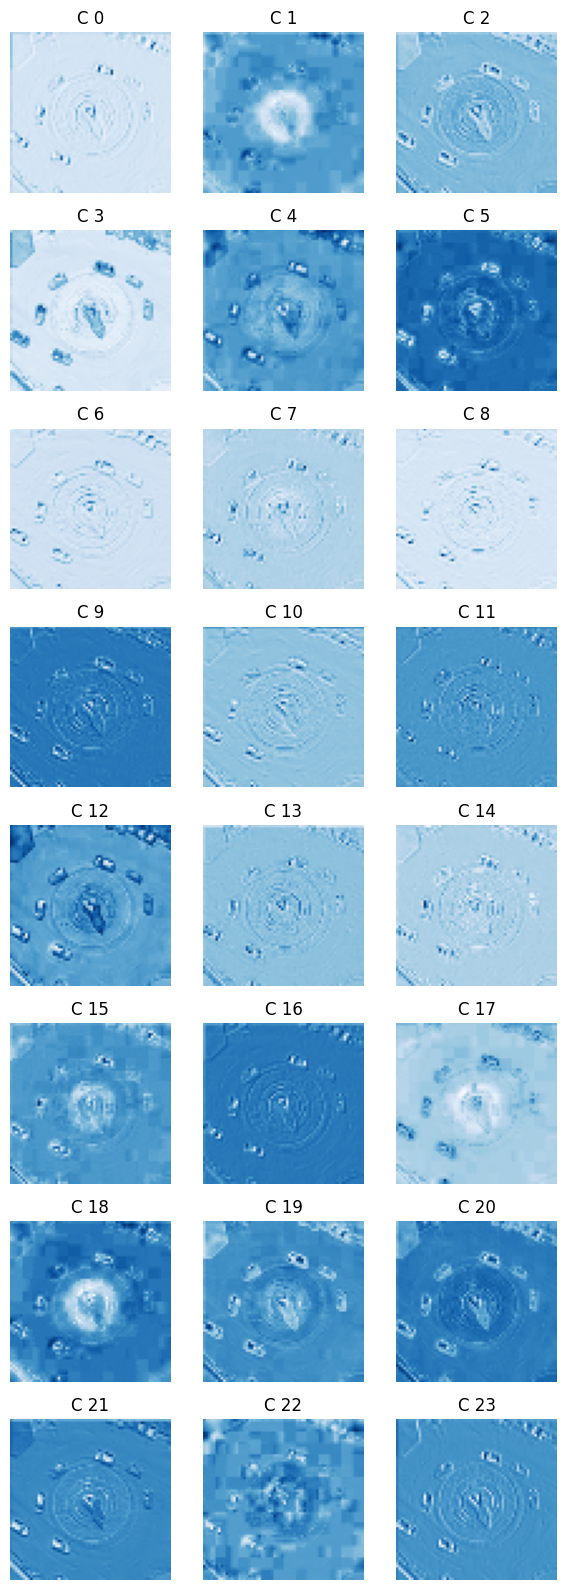

In [21]:
feat = t1[0]  # 取第一个批次，形状变为 (C, H, W)
C = feat.shape[0]  # 获取通道数

# 设置固定的行数
n_rows = 8  # 固定为8行

# 计算需要的列数（向上取整以确保能显示所有通道）
n_cols = int(np.ceil(C / n_rows))

# 创建一个更美观的图表布局
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))  # 每个子图 2x2 英寸

# 将axes展平为一维数组以便于索引
axes = axes.flatten() if n_rows * n_cols > 1 else [axes]

# 遍历所有通道并绘制
for i in range(n_rows * n_cols):
    if i < C:  # 确保索引有效（不超出通道数）
        # 显示该通道的特征图
        im = axes[i].imshow(feat[i], cmap='Blues')
        axes[i].set_title(f'C {i}')
    else:
        # 隐藏多余的子图
        axes[i].axis('off')
        axes[i].set_visible(False)
    
    # 对所有有效的子图，隐藏坐标轴
    if i < C:
        axes[i].axis('off')

# 调整布局，添加总标题
plt.tight_layout()

# plt.savefig('./figs/swin_4x.png', dpi=600, format='png', bbox_inches='tight')

# 显示图像
plt.show()
